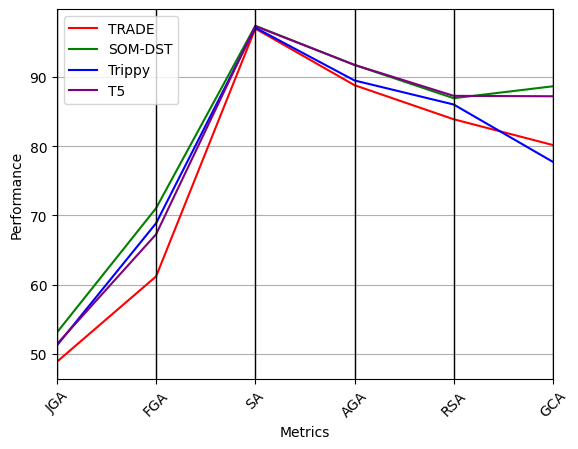

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming you have a DataFrame called 'data' with columns for models and metrics
# and rows representing the performances over the benchmark
data = pd.DataFrame({
    'Model': ['TRADE', 'SOM-DST', 'Trippy', 'T5'],
    'JGA': [48.86, 53.09, 51.22, 51.4],
    'FGA': [61.19, 71.04, 68.87, 67.27],
    'SA': [96.96, 97.36, 97.09, 97.32],
    'AGA': [88.79, 91.71, 89.47, 91.72],
    'RSA': [83.87, 86.91, 86, 87.25],
    'GCA': [80.15, 88.63, 77.72, 87.19]
})

# Set up the plot
fig, ax = plt.subplots()

colors = ['red', 'green', 'blue', 'purple']

pd.plotting.parallel_coordinates(data, 'Model', ax=ax, color=colors)
# Get the metric names
metrics = data.columns[1:]

# Iterate over the data to plot scatter points
# for i, model in enumerate(data['Model']):
#     y = data.iloc[i, 1:]  # y-axis values (performance)
#     ax.scatter(metrics, y, color=colors[i], label=model)  # Scatter plot for each model

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Performance')
plt.legend()

# Display the plot
plt.savefig('../analyses/plots/full_shot.pdf', format='pdf')
plt.show()



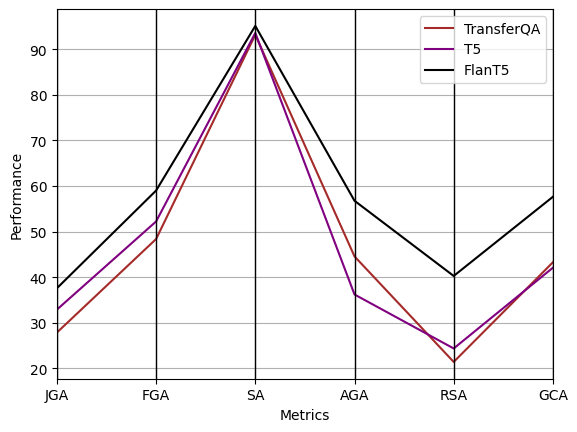

In [2]:
data = pd.DataFrame({
    'Model': ['TransferQA', 'T5', 'FlanT5'],
    'JGA': [27.86, 32.89, 37.58],
    'FGA': [48.37, 52.22, 59.00],
    'SA':  [93.16, 93.56, 95.10],
    'AGA': [44.56, 36.21, 56.76],
    'RSA': [21.42, 24.37, 40.27],
    'GCA': [43.27, 42.08, 57.63]
})
colors = ['brown', 'purple', 'black']
# Set up the plot
fig, ax = plt.subplots()

# Plot the parallel coordinates
pd.plotting.parallel_coordinates(data, 'Model', ax=ax,color=colors)

metrics = data.columns[1:]

# Iterate over the data to plot scatter points
# for i, model in enumerate(data['Model']):
#     y = data.iloc[i, 1:]  # y-axis values (performance)
#     ax.scatter(metrics, y, color=colors[i], label=model)  # Scatter plot for each model

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Performance')
plt.legend()
plt.savefig('../analyses/plots/zero_shot_coordinate.pdf', format='pdf')

# Display the plot
plt.show()

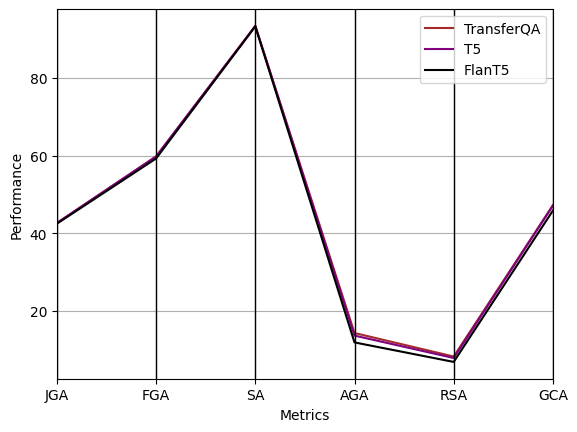

In [3]:
data = pd.DataFrame({
    'Model': ['TransferQA', 'T5', 'FlanT5'],
    'JGA': [42.61, 42.62, 42.45 ],
    'FGA': [59.75, 59.76, 59.24],
    'SA':  [93.36, 93.34, 93.24 ],
    'AGA': [14.3 , 13.64, 11.88],
    'RSA': [8.25 , 7.87 , 6.86 ],
    'GCA': [47.21, 47.09, 45.82]
})

colors = ['brown', 'purple', 'black']
# Set up the plot
fig, ax = plt.subplots()

# Plot the parallel coordinates 
pd.plotting.parallel_coordinates(data, 'Model', ax=ax,color=colors)

metrics = data.columns[1:]

# Iterate over the data to plot scatter points
# for i, model in enumerate(data['Model']):
#     y = data.iloc[i, 1:]  # y-axis values (performance)
#     ax.scatter(metrics, y, color=colors[i], label=model)  # Scatter plot for each model

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add labels and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Performance')
plt.legend()
plt.savefig('../analyses/plots/zero_shot_sgd_coordinate.pdf', format='pdf')
# Display the plot
plt.show()


Bar Plots

/var/folders/tt/89b_9ttj1mb31b1w03hc4t_40000gn/T/ipykernel_20957/2759613427.py:43: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "d". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(bar_positions[metrics.index(metric)] + (i * bar_width), model_value, bar_width, label=model if metric == metrics[0] else "", color=color, hatch= texture)  # Add label only for the first metric to prevent duplicate legend entries


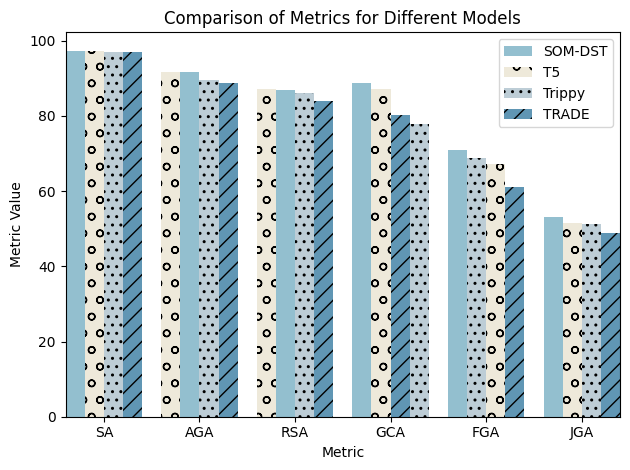

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({
    'Model': ['TRADE', 'SOM-DST', 'Trippy', 'T5'],
    'SA': [96.96, 97.36, 97.09, 97.32],
    'AGA': [88.79, 91.71, 89.47, 91.72],
    'RSA': [83.87, 86.91, 86, 87.25],
    'GCA': [80.15, 88.63, 77.72, 87.19],
    'FGA': [61.19, 71.04, 68.87, 67.27],
    'JGA': [48.86, 53.09, 51.22, 51.4]
    
})

# Extracting metric names
metrics = list(data.columns[1:])

# Setting the width of each bar
bar_width = 0.2

# Setting the positions of the bars on the x-axis
bar_positions = np.arange(len(metrics))

# Defining the color palette
model_palette = ['#6096B4', '#93BFCF', '#BDCDD6', '#EEE9DA']
textures = ["//", "d", "..", "o"]
model2color = {model_name:color for model_name,color in zip(list(data["Model"]),model_palette)}
model2texture = {model_name:texture for model_name,texture in zip(list(data["Model"]),textures)}
# Plotting the bars
for metric in metrics:
    # Sort the models based on the metric's values
    sorted_data = data.sort_values(by=metric, ascending=False)

    for i, model in enumerate(sorted_data['Model']):
        model_value = sorted_data.loc[sorted_data['Model'] == model, metric].values[0]
        
        # Assigning colors to models
        color = model2color[model]
        texture = model2texture[model]
        
        plt.bar(bar_positions[metrics.index(metric)] + (i * bar_width), model_value, bar_width, label=model if metric == metrics[0] else "", color=color, hatch= texture)  # Add label only for the first metric to prevent duplicate legend entries

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics for Different Models')
plt.xticks(bar_positions + (bar_width * (len(data['Model']) - 1) / 2), metrics)

# Adjusting the x-axis limits to omit spacing at the beginning and end
plt.xlim(bar_positions[0] - (bar_width / 2), bar_positions[-1] + (bar_width * len(data['Model']) / 2) + bar_width*1.5)


# Moving the legend to the bottom right
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

# Displaying the bar graph
plt.tight_layout()
plt.savefig('../analyses/plots/full_shot_bar.pdf', format='pdf')
plt.show()

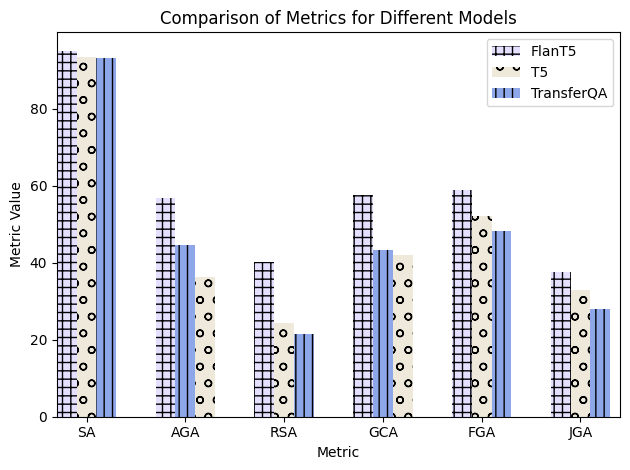

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({
    'Model': ['TransferQA', 'T5', 'FlanT5'],
    'SA':  [93.16, 93.56, 95.10],
    'AGA': [44.56, 36.21, 56.76],
    'RSA': [21.42, 24.37, 40.27],
    'GCA': [43.27, 42.08, 57.63],
    'FGA': [48.37, 52.22, 59.00],
    'JGA': [27.86, 32.89, 37.58]
})

# Extracting metric names
metrics = list(data.columns[1:])

# Setting the width of each bar
bar_width = 0.2

# Setting the positions of the bars on the x-axis
bar_positions = np.arange(len(metrics))

# Defining the color palette
model_palette = ['#8EA7E9', '#EEE9DA','#E5E0FF']
textures = [ "||","o","++"]
model2color = {model_name:color for model_name,color in zip(list(data["Model"]),model_palette)}
model2texture = {model_name:texture for model_name,texture in zip(list(data["Model"]),textures)}

# Plotting the bars
for metric in metrics:
    # Sort the models based on the metric's values
    sorted_data = data.sort_values(by=metric, ascending=False)

    for i, model in enumerate(sorted_data['Model']):
        model_value = sorted_data.loc[sorted_data['Model'] == model, metric].values[0]
        
        # Assigning colors to models
        color = model2color[model]
        texture = model2texture[model]
        
        plt.bar(bar_positions[metrics.index(metric)] + (i * bar_width), model_value, bar_width, label=model if metric == metrics[0] else "", color=color, hatch = texture)  # Add label only for the first metric to prevent duplicate legend entries

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics for Different Models')
plt.xticks(bar_positions + (bar_width * (len(data['Model']) - 1) / 2), metrics)

# Adjusting the x-axis limits to omit spacing at the beginning and end
plt.xlim(bar_positions[0] - (bar_width / 2), bar_positions[-1] + (bar_width * len(data['Model']) / 2) + bar_width*1.5)


# Moving the legend to the bottom right
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

# Displaying the bar graph
plt.tight_layout()
plt.savefig('../analyses/plots/zero_shot_bar.pdf', format='pdf')
plt.show()

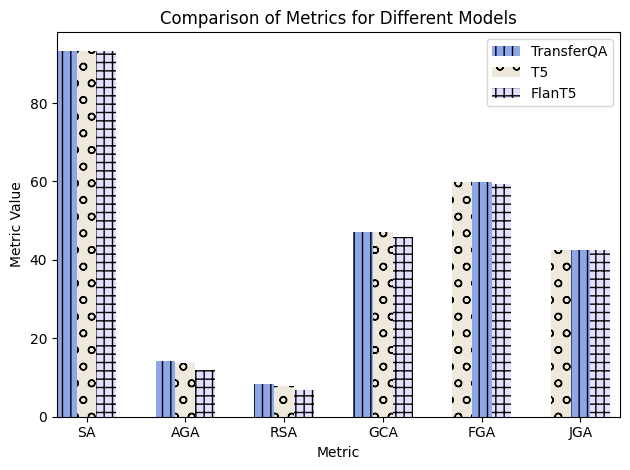

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({
    'Model': ['TransferQA', 'T5', 'FlanT5'],
    'SA':  [93.36, 93.34, 93.24 ],
    'AGA': [14.3 , 13.64, 11.88],
    'RSA': [8.25 , 7.87 , 6.86 ],
    'GCA': [47.21, 47.09, 45.82],
    'FGA': [59.75, 59.76, 59.24],
    'JGA': [42.61, 42.62, 42.45 ]
})

# Extracting metric names
metrics = list(data.columns[1:])

# Setting the width of each bar
bar_width = 0.2

# Setting the positions of the bars on the x-axis
bar_positions = np.arange(len(metrics))

# Defining the color palette
model_palette = ['#8EA7E9', '#EEE9DA','#E5E0FF']
textures = [ "||","o","++"]
model2color = {model_name:color for model_name,color in zip(list(data["Model"]),model_palette)}
model2texture = {model_name:texture for model_name,texture in zip(list(data["Model"]),textures)}

# Plotting the bars
for metric in metrics:
    # Sort the models based on the metric's values
    sorted_data = data.sort_values(by=metric, ascending=False)

    for i, model in enumerate(sorted_data['Model']):
        model_value = sorted_data.loc[sorted_data['Model'] == model, metric].values[0]
        
        # Assigning colors to models
        color = model2color[model]
        texture = model2texture[model]
        
        plt.bar(bar_positions[metrics.index(metric)] + (i * bar_width), model_value, bar_width, label=model if metric == metrics[0] else "", color=color, hatch = texture)  # Add label only for the first metric to prevent duplicate legend entries

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics for Different Models')
plt.xticks(bar_positions + (bar_width * (len(data['Model']) - 1) / 2), metrics)

# Adjusting the x-axis limits to omit spacing at the beginning and end
plt.xlim(bar_positions[0] - (bar_width / 2), bar_positions[-1] + (bar_width * len(data['Model']) / 2) + bar_width*1.5)


# Moving the legend to the bottom right
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

# Displaying the bar graph
plt.tight_layout()
plt.savefig('../analyses/plots/zero_shot_sgd_bar.pdf', format='pdf')
plt.show()
